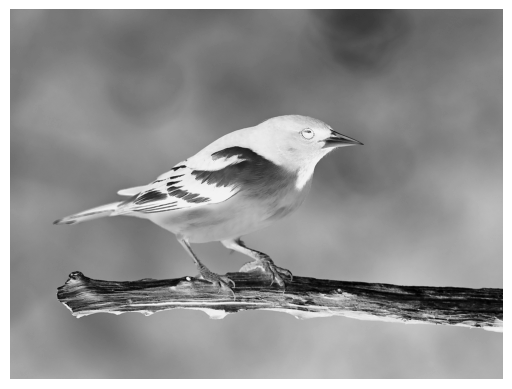

In [1]:
### lab 1.1
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

# Mở ảnh xám (grayscale)
img = Image.open('bird.png').convert('L')

# Chuyển ảnh thành mảng numpy
im_1 = np.asarray(img)

# Thực hiện phép nghịch đảo ảnh (inversion)
im_2 = 255 - im_1

# Chuyển mảng numpy thành ảnh
new_img = Image.fromarray(im_2)

# Hiển thị ảnh gốc
img.show()

# Hiển thị ảnh đã nghịch đảo bằng matplotlib
plt.imshow(new_img, cmap='gray')
plt.axis('off')
plt.show()


C:\Users\US\AppData\Local\Temp\ipykernel_16280\68589576.py:28: RuntimeWarning: divide by zero encountered in log
  b2 = np.log(b3) * gamma


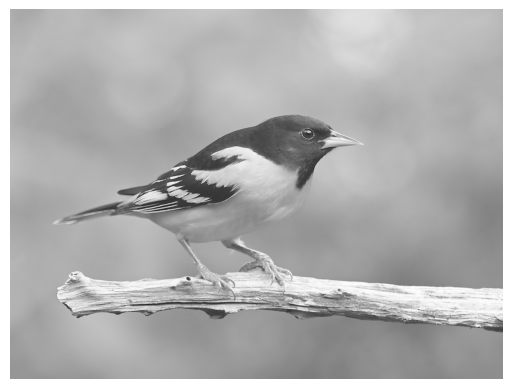

In [2]:
### lab 1.2
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

# Mở ảnh grayscale
img = Image.open('bird.png').convert('L')

# Chuyển ảnh thành mảng numpy
im_1 = np.asarray(img)

# Khởi tạo giá trị gamma
gamma = 0.5

# Chuyển mảng sang kiểu float để tính toán
b1 = im_1.astype(float)

# Tìm giá trị lớn nhất trong ảnh
b2 = np.max(b1)

# Chuẩn hóa ảnh về khoảng [0, 1]
b3 = b1 / b2

# Tính log và nhân với gamma để chuẩn bị cho hiệu chỉnh gamma
b2 = np.log(b3) * gamma

# Áp dụng hiệu chỉnh gamma và scale lại về [0, 255]
c = np.exp(b2) * 255.0

# Chuyển ảnh về kiểu int để hiển thị
c1 = c.astype(int)

# Tạo ảnh mới từ mảng đã xử lý
d = Image.fromarray(c1)

# Hiển thị ảnh gốc và ảnh đã hiệu chỉnh gamma
img.show()
d.show()

plt.imshow(d, cmap='gray')
plt.axis('off')
plt.show()


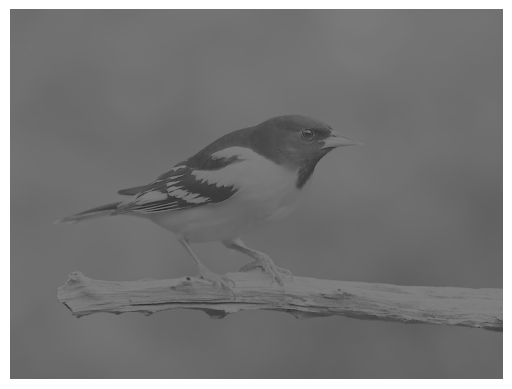

In [3]:
### 1.3
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

# Mở ảnh grayscale
img = Image.open('bird.png').convert('L')

# Chuyển ảnh thành mảng numpy
im_1 = np.asarray(img)

# Chuyển từ kiểu int sang float để dễ xử lý
b1 = im_1.astype(float)

# Tìm giá trị lớn nhất trong ảnh
b2 = np.max(b1)

# Áp dụng biến đổi logarit (log transformation)
# Công thức chuẩn hóa ảnh với hệ số 128
c = (128.0 * np.log(1 + b1)) / np.log(1 + b2)

# Chuyển ảnh về kiểu int
c1 = c.astype(int)

# Tạo ảnh mới từ mảng đã xử lý
d = Image.fromarray(c1)

# Hiển thị ảnh gốc và ảnh đã biến đổi logarit
img.show()
d.show()

plt.imshow(d, cmap='gray')
plt.axis('off')
plt.show()



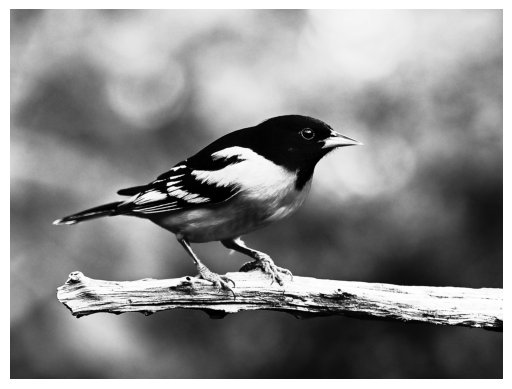

In [4]:
### 1.4
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

# Mở ảnh grayscale
img = Image.open('bird.png').convert('L')

# Chuyển ảnh thành mảng numpy
im1 = np.asarray(img)

# Chuyển mảng 2D thành 1D để xử lý histogram
bl = im1.flatten()

# Tính histogram và các bin
hist, bins = np.histogram(bl, bins=256, range=[0, 255])

# Tính hàm phân phối tích lũy (CDF)
cdf = hist.cumsum()

# Bỏ qua các giá trị bằng 0 trong CDF (để tránh chia cho 0)
cdf_m = np.ma.masked_equal(cdf, 0)

# Thực hiện histogram equalization
cdf_min = cdf_m.min()
cdf_max = cdf_m.max()
den_cdf = cdf_max - cdf_min
cdf_m = (cdf_m - cdf_min) * 255 / den_cdf
cdf_m = np.ma.filled(cdf_m, 0).astype('uint8')

# Sử dụng giá trị CDF đã tính để ánh xạ lại các pixel trong ảnh
im2 = cdf_m[bl]

# Đưa ảnh về lại dạng 2D
im3 = im2.reshape(im1.shape)

# Chuyển mảng numpy thành ảnh
im4 = Image.fromarray(im3)

# Hiển thị ảnh gốc và ảnh sau khi equalization
img.show()
im4.show()

plt.imshow(im4, cmap='gray')
plt.axis('off')
plt.show()


0 255


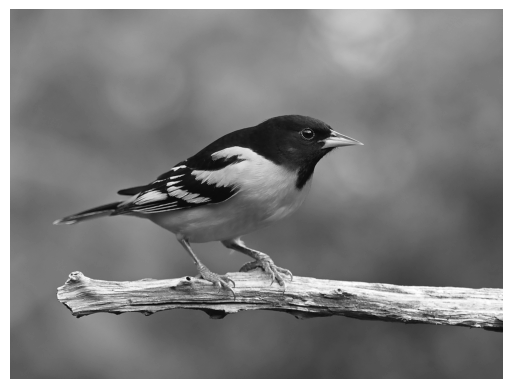

In [5]:
### 1.5
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

# Mở ảnh grayscale
img = Image.open('bird.png').convert('L')

# Chuyển ảnh thành mảng numpy
im1 = np.asarray(img)

# Tìm giá trị lớn nhất và nhỏ nhất của pixel trong ảnh
b = im1.max()
a = im1.min()
print(a, b)  # In ra giá trị min và max

# Chuyển ảnh sang kiểu float để xử lý
c = im1.astype(float)

# Áp dụng phép biến đổi kéo giãn độ tương phản
im2 = 255 * (c - a) / (b - a)

# Chuyển ảnh về kiểu nguyên và tạo ảnh mới
im3 = Image.fromarray(im2.astype(np.uint8))

# Hiển thị ảnh gốc và ảnh sau khi xử lý
img.show()
im3.show()

plt.imshow(im3, cmap='gray')
plt.axis('off')
plt.show()



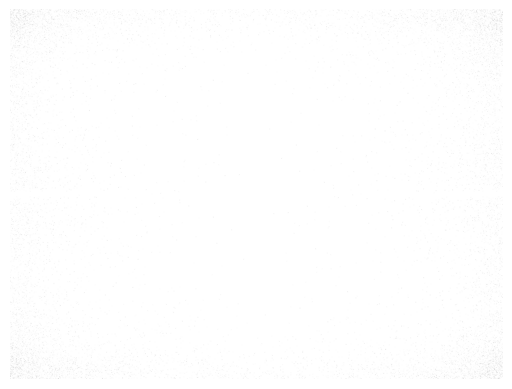

In [6]:
### 1.6
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

# Mở ảnh grayscale
img = Image.open('bird.png').convert('L')

# Chuyển ảnh thành mảng numpy
im1 = np.asarray(img)

# Thực hiện biến đổi Fourier nhanh (FFT) và lấy giá trị biên độ
c = abs(scipy.fftpack.fft2(im1))

# Dịch ảnh phổ Fourier về tâm (shift zero-frequency component to center)
d = scipy.fftpack.fftshift(c)

# Chuyển dữ liệu về float để hiển thị
d = d.astype(float)

# Tạo ảnh từ dữ liệu đã xử lý
im3 = Image.fromarray(d)

# Hiển thị ảnh gốc và ảnh phổ Fourier
img.show()
im3.show()

plt.imshow(im3, cmap='gray')
plt.axis('off')
plt.show()


In [7]:
### lab 1.6.2
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

# Mở ảnh grayscale
img = Image.open('world_cup.jpg').convert('L')

# Chuyển ảnh thành mảng numpy
im1 = np.asarray(img)

# Thực hiện FFT và dịch phổ về tâm
a = scipy.fftpack.fft2(im1)
b = scipy.fftpack.fftshift(a)

# Lấy kích thước ảnh
M, N = im1.shape

# Khởi tạo bộ lọc Butterworth Lowpass Filter (BLPF)
H = np.ones((M, N))

# Tâm của ảnh
center1 = M / 2
center2 = N / 2

# Thiết lập bán kính cắt (cutoff radius) và bậc n của BLPF
d0 = 50  # cutoff
n = 1    # order

# Tính giá trị của bộ lọc H(u, v) cho BLPF
for i in range(M):
    for j in range(N):
        d = np.sqrt((i - center1)**2 + (j - center2)**2)  # khoảng cách từ tâm
        H[i, j] = 1 / (1 + (d / d0)**(2 * n))  # công thức BLPF

# Áp dụng bộ lọc trong miền tần số
c = H * b

# Biến đổi ngược FFT để quay lại miền không gian
d = scipy.fftpack.ifft2(c)

# Lấy biên độ (magnitude) của ảnh phức sau biến đổi ngược
e = abs(d)

# Chuyển dữ liệu về kiểu float để tạo ảnh
im3 = Image.fromarray(e.astype(float))

# Hiển thị ảnh
img.show()
im3.show()
plt.imshow(im3, cmap='gray')
plt.axis('off')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'world_cup.jpg'

In [ ]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

# Mở ảnh grayscale
img = Image.open('world_cup.jpg').convert('L')

# Chuyển ảnh thành mảng numpy
im1 = np.asarray(img)

# Thực hiện biến đổi Fourier và dịch về tâm
a = scipy.fftpack.fft2(im1)
b = scipy.fftpack.fftshift(a)

# Kích thước ảnh
M, N = im1.shape

# Khởi tạo mặt nạ lọc H với giá trị ban đầu là 1
H = np.ones((M, N))

# Tính tâm ảnh
center1 = M / 2
center2 = N / 2

# Tham số của BLPF
d0 = 30.0  # bán kính cutoff
t1 = 2     # bậc của Butterworth filter

# Tạo bộ lọc Butterworth Lowpass Filter
for i in range(M):
    for j in range(N):
        r2 = (i - center1)**2 + (j - center2)**2
        d = math.sqrt(r2)
        if d != 0:
            H[i, j] = 1 / (1 + (d / d0)**(2 * t1))
        else:
            H[i, j] = 1  # tránh chia cho 0

# Nhân mặt nạ với phổ ảnh để lọc tần số
con = H * b

# Biến đổi ngược về không gian
e = abs(scipy.fftpack.ifft2(con))

# Chuyển sang kiểu dữ liệu hiển thị được
im5 = Image.fromarray(e.astype(np.uint8))

# Hiển thị ảnh
img.show()
im5.show()
plt.imshow(im5, cmap='gray')
plt.axis('off')
plt.show()
